In [28]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction import FeatureHasher

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)

In [29]:
train_path = 'input/inputTrain.csv'
test_path = 'input/inputTest.csv'

In [30]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [31]:
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,29989.000000,29990.000000,29991.000000,29992.000000,29993.000000,29994.000000,29995.000000,29996.000000,29997.000000,29998.000000
carid,1.000000,2.000000,5.000000,6.000000,7.000000,10.000000,12.000000,13.000000,14.000000,18.000000,...,64261.000000,42866.000000,24598.000000,72533.000000,27237.000000,18531.000000,4294.000000,20584.000000,11490.000000,28672.000000
tradeTime,0.840336,0.827731,0.802521,0.844538,0.848739,0.756303,0.789916,0.920168,0.974790,0.718487,...,0.802521,-0.655462,0.873950,0.235294,0.546218,0.701681,-0.798319,-0.310924,-0.130252,-0.012605
mileage,-0.534415,0.315772,1.028558,-0.089701,-0.154414,0.810883,0.082312,-0.379565,1.083441,-0.204128,...,-0.637535,-0.402953,0.100099,0.056000,-0.136970,0.538139,0.680581,0.478198,0.441610,-0.558113
color_1,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l6,0.668317,-0.049505,-0.222772,1.074257,0.574257,-0.198020,0.222772,-0.148515,-0.143564,-0.173267,...,0.985149,0.841584,-0.074257,0.970297,1.014851,0.396040,-0.049505,0.099010,-0.198020,-0.168317
l7,-1.175993,-0.271037,-0.715401,-0.235116,-0.813323,-1.280552,-1.730886,-0.130919,-0.499289,-0.334701,...,0.454206,0.105606,-0.430253,0.416118,0.167502,-1.196486,0.693357,-0.568485,0.480517,0.405306
l8,-0.247441,-0.252904,-0.604505,0.635244,-0.169895,-0.937574,-0.769392,-0.273900,-0.481734,-0.475091,...,0.941090,0.705644,-0.333004,0.940380,0.847939,-0.369935,0.270279,-0.047498,0.040985,-0.002290
l9,0.229515,-0.226296,-0.531781,0.918661,0.311352,-0.627546,-0.475458,-0.273810,-0.352787,-0.290792,...,1.062477,0.741570,-0.313537,1.007418,0.964963,-0.112968,0.009225,-0.362698,-0.199016,-0.164260


In [32]:
X = train_df.drop(columns='price').to_numpy()

In [33]:
tsne = TSNE(n_components = 2)
tsne.fit_transform(X)
pairwise_feature = tsne.embedding_
pairwise_feature

array([[-73.92476 ,  48.53945 ],
       [-73.91573 ,  48.542767],
       [-73.896416,  48.549862],
       ...,
       [ 46.749115, -57.67039 ],
       [ 68.36174 , -16.956444],
       [-19.706566, -12.105837]], dtype=float32)

In [57]:
TSNE_list = []
for i in range(len(train_df)):
    TSNE_list.append((pairwise_feature[i][0], pairwise_feature[i][1], train_df['price'][i]))
    
x = [i[0] for i in TSNE_list]
y = [i[1] for i in TSNE_list]
z = [np.exp(i[2]) - 1 for i in TSNE_list]

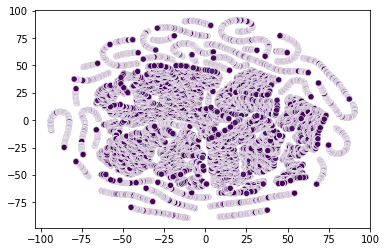

In [40]:
fig = plt.figure()
sns.scatterplot(x, y, c = z)
plt.show()

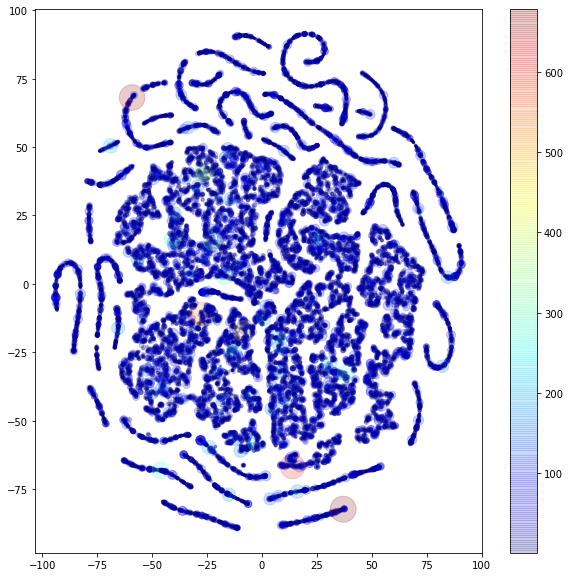

In [49]:
fig,ax = plt.subplots(figsize=(10, 10))
ax_plot = ax.scatter(x, y, alpha=0.2, s = z, c = z, cmap=plt.get_cmap('jet'))
fig.colorbar(ax_plot, ax=ax)

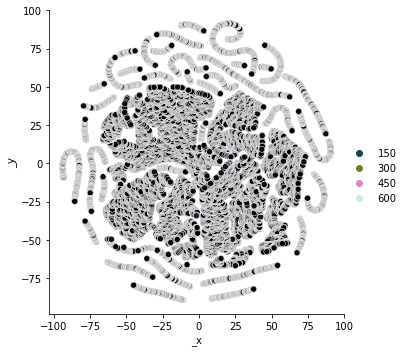

In [61]:
fig = sns.relplot(x, y, hue=z, palette=sns.color_palette("cubehelix", as_cmap=True))

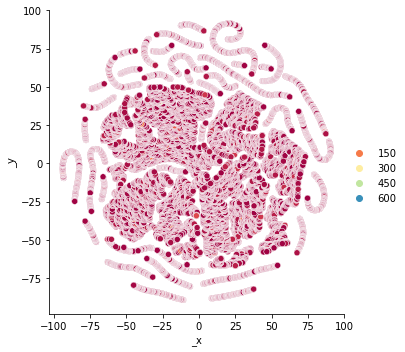

In [59]:
fig = sns.relplot(x, y, hue=z, palette=sns.color_palette("Spectral", as_cmap=True))